In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('ETH2019-2024.csv')
df1 = df.reset_index()['Close']

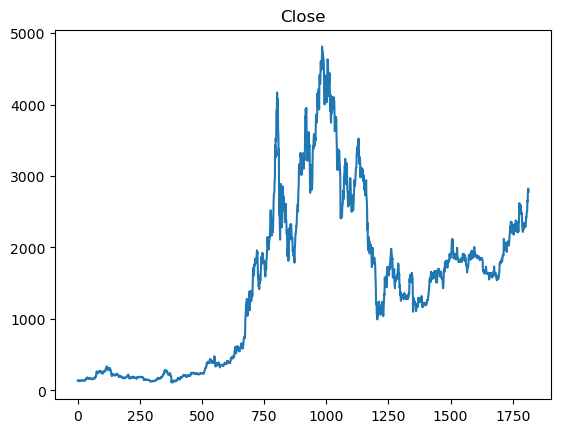

In [3]:
plt.plot(df1)
plt.title("Close")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1169, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.2359424 , 0.25498702, 0.25089018, 0.25911707, 0.24718749,
       0.25526202, 0.25194128, 0.24940372, 0.24720577, 0.25376976,
       0.25166715, 0.25343582, 0.2541175 , 0.25473647, 0.27638423,
       0.27557919, 0.25307411, 0.23487394, 0.2390312 , 0.23984197,
       0.23190105, 0.24108848, 0.24070989, 0.23994043, 0.24129565,
       0.24068408, 0.23774259, 0.24318562, 0.23879529, 0.23706765,
       0.23843074, 0.24084314, 0.23827923, 0.23989143, 0.24080286,
       0.23994603, 0.25409578, 0.25395546, 0.25459393, 0.25295042,
       0.25267768, 0.2735184 , 0.27479241, 0.27622194, 0.29886247,
       0.3067318 , 0.30848126, 0.30918524, 0.30878864, 0.31027634,
       0.31288396, 0.31092574, 0.32199458, 0.32224088, 0.32308917,
       0.32312784, 0.31648163, 0.3221955 , 0.3180216 , 0.31953705,
       0.31588846, 0.32744921, 0.31530003, 0.31575898, 0.32699192,
       0.32809823, 0.32606387, 0.3274746 , 0.3262567 , 0.32418787,
       0.32784475, 0.33017161, 0.31674744, 0.31292412, 0.31084

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.23649547, 0.25320118, 0.24884755, 0.25493738, 0.24504654,
       0.2506577 , 0.24930753, 0.24994844, 0.24462718, 0.25326936,
       0.25345618, 0.25349449, 0.25213524, 0.25266729, 0.26308386,
       0.26379625, 0.25386504, 0.2380271 , 0.24121271, 0.24028966,
       0.23624443, 0.24094582, 0.24031881, 0.24079698, 0.24014245,
       0.23854489, 0.23650948, 0.23933017, 0.23796027, 0.23747417,
       0.23819912, 0.2384708 , 0.23907456, 0.23893088, 0.23906619,
       0.23868945, 0.2495192 , 0.24892101, 0.248599  , 0.24809945,
       0.24952357, 0.26056798, 0.26632318, 0.27808699, 0.28896988,
       0.2977154 , 0.30761455, 0.30803366, 0.30832127, 0.30818452,
       0.30936301, 0.30856904, 0.32184833, 0.32402242, 0.32558358,
       0.32447853, 0.31506857, 0.31953175, 0.31971685, 0.31957771,
       0.31474407, 0.3237172 , 0.31397382, 0.31357446, 0.32433008,
       0.32782319, 0.32944174, 0.32950553, 0.32612728, 0.32461544,
       0.3290979 , 0.33058284, 0.3152979 , 0.3074714 , 0.30638

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Trực quan

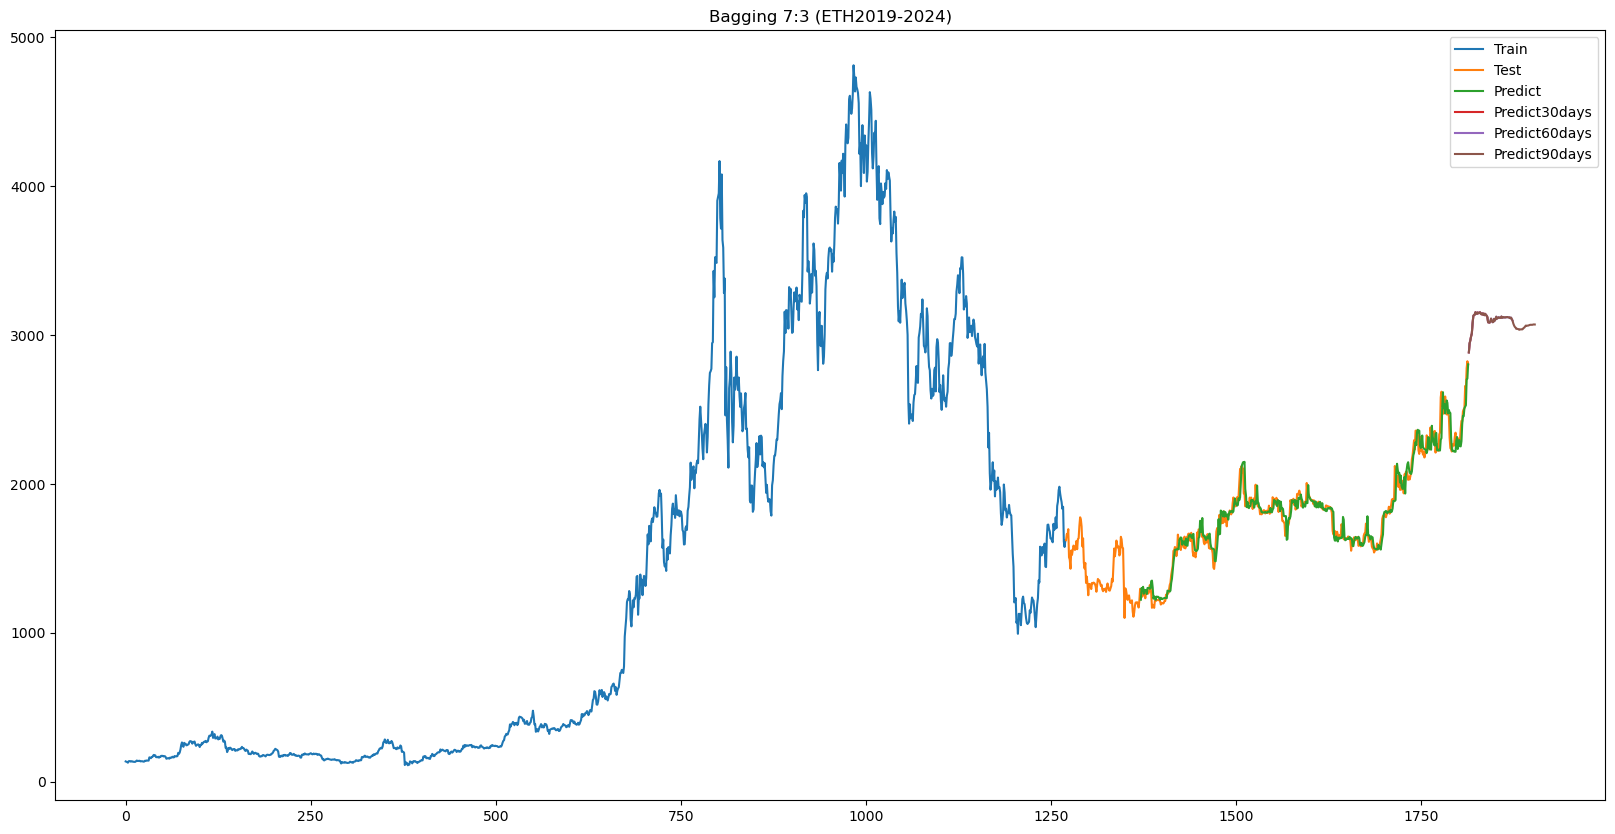

In [26]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 7:3 (ETH2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Assume you have predictions in the scaled form
predictions_scaled = np.array(bagged_y_pred).reshape(-1, 1)
predictions_scaled1 = np.array(y_test).reshape(-1, 1)

# Inverse transform the scaled predictions
predictions_original = scaler.inverse_transform(predictions_scaled)
predictions_original1 = scaler.inverse_transform(predictions_scaled1)


In [28]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Bagging:", round(metrics.mean_squared_error(y_test, predictions_original), 4))
test_rmse = np.sqrt(np.mean((predictions_original - predictions_original1)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((predictions_original - predictions_original1) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Bagging: 3410236.8333
Testing RMSE: 51.1602610498518
Testing MAPE: 10227.606444438647
